In [145]:
import pandas as pd
from glob import glob
from re import match
from missingno import matrix as mmatrix
from matplotlib import pyplot as plt


In [77]:
CSVs = glob('data/*/*.csv')

for csv in CSVs:
    csv = csv.replace('\\', '/')
    file = match(r'data.*/(.*?)\.csv', csv).group(1)
    print(file)
    exec(f'{file} = pd.read_csv("{csv}")')
    exec(f'{file}["state"] = "{file.split('_')[-1].upper()}"')


forecastdemand_qld
forecastdemand_sa
forecastdemand_vic
temprature_qld
temprature_sa
temprature_vic
totaldemand_qld
totaldemand_sa
totaldemand_vic
forecastdemand_nsw
temperature_nsw
totaldemand_nsw


In [153]:
dem = pd.concat([totaldemand_qld, totaldemand_sa, totaldemand_vic])

dem.DATETIME = pd.to_datetime(dem.DATETIME, format="%Y-%m-%d %H:%M:%S")
totaldemand_nsw.DATETIME = pd.to_datetime(totaldemand_nsw.DATETIME, format="%d/%m/%Y %H:%M")
dem = pd.concat([dem, totaldemand_nsw]).reset_index(drop=True)\
    .drop(columns=['REGIONID'])

print(dem.isnull().sum())

dem


DATETIME       0
TOTALDEMAND    0
state          0
dtype: int64


,DATETIME,TOTALDEMAND,state
0,2010-01-01 00:00:00,5561.21,QLD
1,2010-01-01 00:30:00,5422.25,QLD
2,2010-01-01 01:00:00,5315.98,QLD
3,2010-01-01 01:30:00,5186.70,QLD
4,2010-01-01 02:00:00,5050.83,QLD
...,...,...,...
786046,2021-03-17 22:00:00,7419.77,NSW
786047,2021-03-17 22:30:00,7417.91,NSW
786048,2021-03-17 23:00:00,7287.32,NSW
786049,2021-03-17 23:30:00,7172.39,NSW


In [204]:
fore = pd.concat([
    forecastdemand_qld, forecastdemand_sa, forecastdemand_vic, forecastdemand_nsw
]).drop(columns=['REGIONID'])

for col in ["LASTCHANGED", "DATETIME"]:
    fore[col] = pd.to_datetime(fore[col], format="%Y-%m-%d %H:%M:%S")

print(fore.isnull().sum())

fore


PREDISPATCHSEQNO    0
PERIODID            0
FORECASTDEMAND      0
LASTCHANGED         0
DATETIME            0
state               0
dtype: int64


,PREDISPATCHSEQNO,PERIODID,FORECASTDEMAND,LASTCHANGED,DATETIME,state
0,2016123018,71,6425.36,2016-12-30 12:31:25,2017-01-01 00:00:00,QLD
1,2016123018,72,6193.34,2016-12-30 12:31:25,2017-01-01 00:30:00,QLD
2,2016123018,73,6016.45,2016-12-30 12:31:25,2017-01-01 01:00:00,QLD
3,2016123018,74,5859.23,2016-12-30 12:31:25,2017-01-01 01:30:00,QLD
4,2016123018,75,5767.15,2016-12-30 12:31:25,2017-01-01 02:00:00,QLD
...,...,...,...,...,...,...
10906014,2021031736,5,7028.45,2021-03-17 21:31:31,2021-03-18 00:00:00,NSW
10906015,2021031737,4,7041.65,2021-03-17 22:01:34,2021-03-18 00:00:00,NSW
10906016,2021031738,3,7087.60,2021-03-17 22:31:36,2021-03-18 00:00:00,NSW
10906017,2021031739,2,7087.28,2021-03-17 23:01:36,2021-03-18 00:00:00,NSW


In [162]:
temp = pd.concat([temprature_qld, temperature_nsw, temprature_vic])
temp.DATETIME = pd.to_datetime(temp.DATETIME, format="%d/%m/%Y %H:%M")

temprature_sa.DATETIME = pd.to_datetime(temprature_sa.DATETIME, format="%Y-%m-%d %H:%M:%S")
temp = pd.concat([temp, temprature_sa])\
    .drop(columns = ['Unnamed: 0', 'LOCATION']).reset_index(drop=True)

print(temp.isnull().sum())

temp


DATETIME       0
TEMPERATURE    0
state          0
dtype: int64


,DATETIME,TEMPERATURE,state
0,2010-01-01 00:00:00,23.6,QLD
1,2010-01-01 00:30:00,23.7,QLD
2,2010-01-01 01:00:00,23.5,QLD
3,2010-01-01 01:30:00,22.6,QLD
4,2010-01-01 02:00:00,22.0,QLD
...,...,...,...
778172,2021-03-17 22:00:00,19.6,SA
778173,2021-03-17 22:30:00,19.5,SA
778174,2021-03-17 23:00:00,19.4,SA
778175,2021-03-17 23:30:00,19.6,SA


<Axes: >

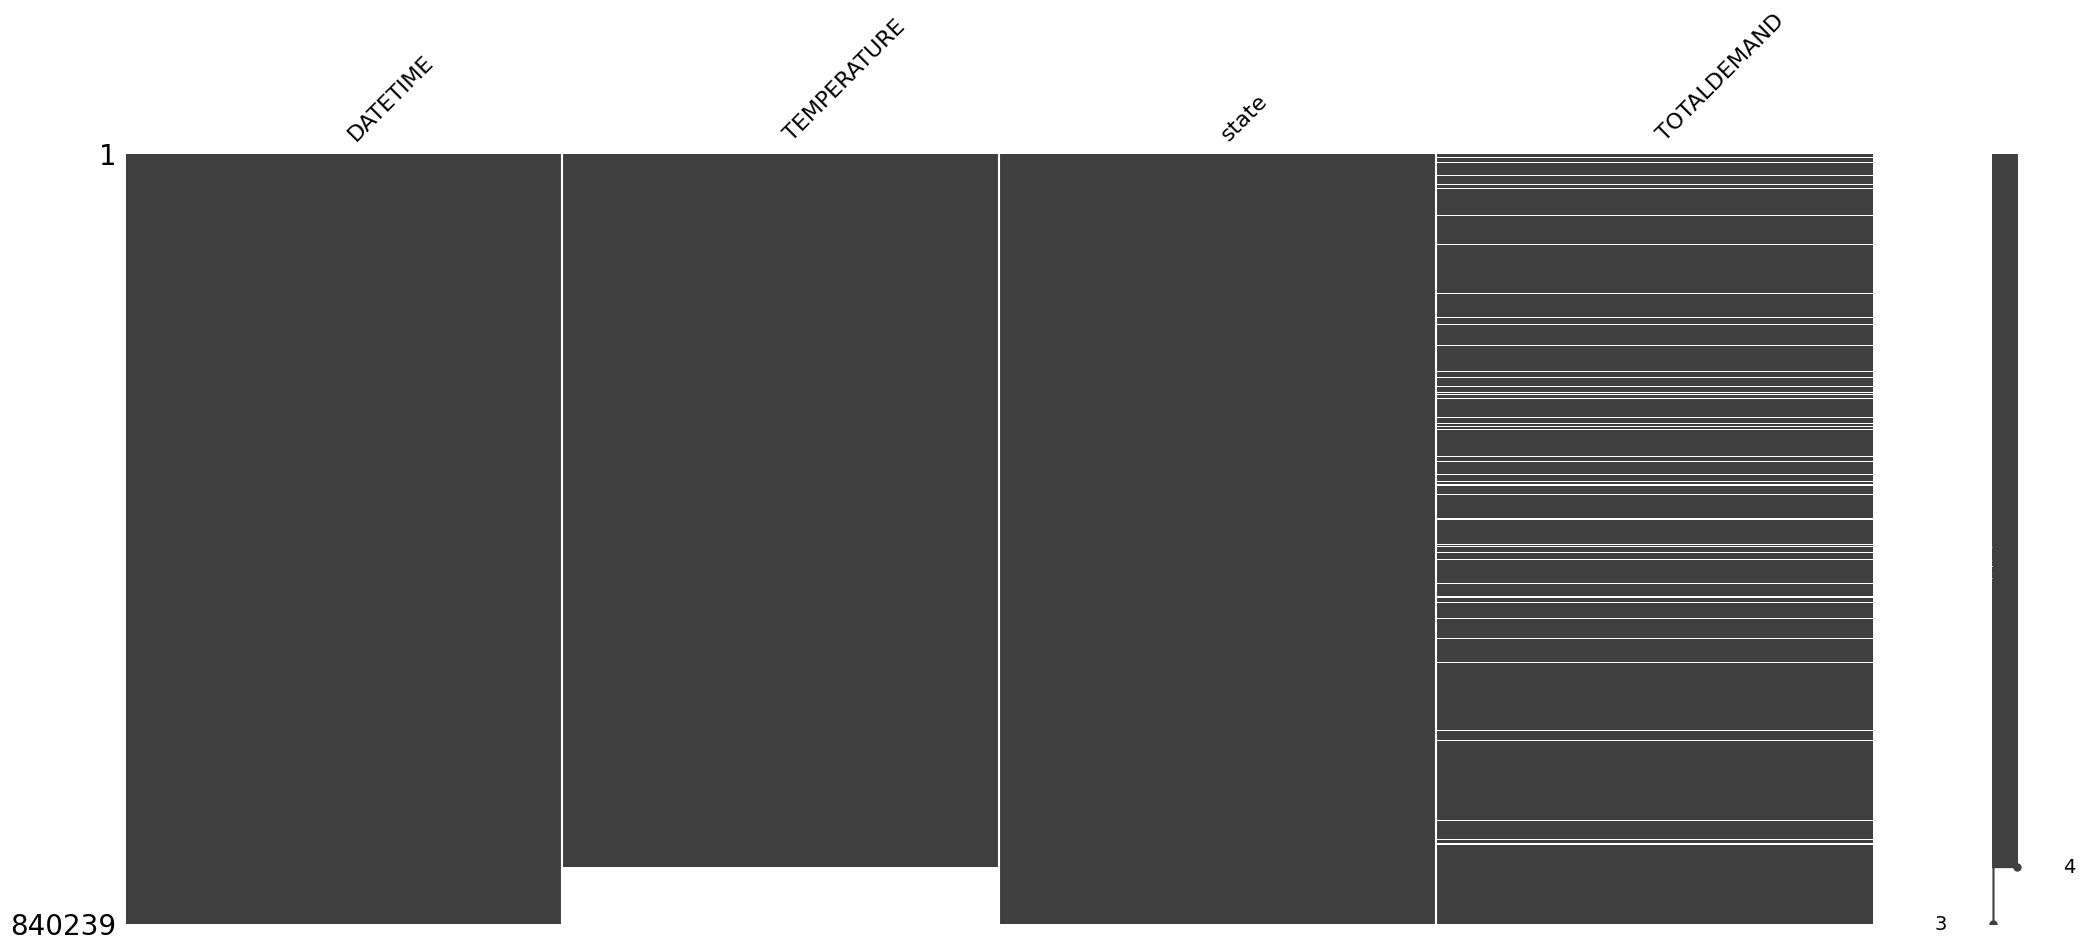

In [171]:
mmatrix(pd.merge(temp, dem, on=['DATETIME', 'state'], how='outer'))


In [121]:
from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi
from urllib.parse import quote_plus


In [132]:
uri = "mongodb+srv://<user>:<password>@project-data.cfluj8d.mongodb.net/?retryWrites=true&w=majority&appName=project-data"\
    .replace('<user>', quote_plus(user)).replace('<password>', quote_plus(psw))

# Create a new client and connect to the server
client = MongoClient(uri, server_api=ServerApi('1'))

# Send a ping to confirm a successful connection
client.admin.command('ping')
print("Pinged your deployment. You successfully connected to MongoDB!")



Pinged your deployment. You successfully connected to MongoDB!


In [207]:
print(client.list_database_names())


['data', 'admin']
['forecast_demand', 'total_demand', 'temperature']


In [208]:
# client['data']['temperature'].insert_many(temp.to_dict(orient='records'))
# client['data']['total_demand'].insert_many(dem.to_dict(orient='records'))
# client['data']['forecast_demand'].insert_many(fore.to_dict(orient='records'))


In [210]:
for col in client['data'].list_collection_names():
    print(f"{col}: {client['data'][col].count_documents({}):,} records")
    

forecast_demand: 23,192,795 records
total_demand: 786,051 records
temperature: 778,177 records
